In [1]:
%%time
%run -i 'nlp_implementation.py' #imports packages and inits alltext
print("printed")
lex1 = make_doc("Lex_Fridman_Podcast/140-lisa-feldman-barrett-love-evolution-and-the-human-brain.txt")
print("done")

printed
done
CPU times: user 14.6 s, sys: 2.04 s, total: 16.7 s
Wall time: 16.8 s


In [24]:
name = "Lex_Fridman_Podcast/140-lisa-feldman-barrett-love-evolution-and-the-human-brain.txt"
doc = nlp(" ".join(re.split("[_/-]",name)))
ents = list([ent for ent in doc.ents if ent.label_ == "PERSON"])
# doc._.host = ents[0]
# doc._.guest = ents[1]
print(ents)

[Lex Fridman, lisa feldman barrett]


In [3]:
for sent in lex1.sents:
    for tok in sent:
        if any([tok.text=="book" for tok in sent]):
            print(sent, "****")
            break

AttributeError: 'NoneType' object has no attribute 'sents'

In [23]:
print(lex1._.host)

Lisa Feldman Barrett


In [3]:
with open("normal.txt", 'w+') as w, open("coref.txt", "w+") as w1:
    w.write(lex1.text)
    w1.write(lex1._.coref_resolved)

In [5]:
nlp("Lex Fridman").similarity(nlp("Lexy"))

0.3338638377603144

In [4]:
# [ent for ent in list(lex1.ents) if ent.label_=="PERSON" and ent.label_!=lex1._.host.text]
print(lex1._.host,"\n")
for ent in lex1.ents:
    if ent.label_=="PERSON" and ent.text not in lex1._.host and ent.text not in lex1._.guest:
        print(ent)

Lex Fridman 

Benoit
Kelis
athey
YouTube
Elex Friedemann
Chris Hadfield
Neil deGrasse Tyson
Carlos Santana
Garry Kasparov
Daniel Nagorno Poker
Neil Gaiman
Martin Scorsese
Tony Hawk Skateboarding
Jane Goodall
David Goggins
Sigmund Freud
Carl Jung
Dan
Dan
Fountainhead
Fountainhead
Dand
Madeleine
Dan
Kevin
Kevin
Kevin
Kevin
Kevin
Kevin
Kevin
dammit
Jack Kerouac
Faulds
Dan
Valentine
Anne Fadiman
Dan
Darwin
Cambrian
Jordt
Essence
Stalin
Hitler
Hitlers
Hitler
Hitler
Hitler
Borat
Borat
Trump
Hitler
Hitler
Hitler
covid
Michele Gelfond
ajai
HAL
Dan
A.I.
Tom Hanks
Wilson
Hazel Marcus
Stalin
Hitler
Sophia
Richard Lewontin
Kurt Danziger
Kurt Danzinger
Stephen King
Ted
Van Yáng
Joseph Fredman
Darwin
Darwin
Darwin
Pettigrew
Helen Simons
Zhivago
Lexy
Sun Tzu


In [10]:
def get_entities(sent):
    ent1 = ""
    ent2 = ""

    prv_tok_dep = ""    # dependency tag of previous token in the sentence
    prv_tok_text = ""   # previous token in the sentence

    prefix = ""
    modifier = ""
    
    for tok in nlp(sent):
        ## chunk 2
        # if token is a punctuation mark then move on to the next token
        if tok.dep_ != "punct":
          # check: token is a compound word or not
          if tok.dep_ == "compound":
            prefix = tok.text
            # if the previous word was also a 'compound' then add the current word to it
            if prv_tok_dep == "compound":
              prefix = prv_tok_text + " "+ tok.text

          # check: token is a modifier or not
          if tok.dep_.endswith("mod") == True:
            modifier = tok.text
            # if the previous word was also a 'compound' then add the current word to it
            if prv_tok_dep == "compound":
              modifier = prv_tok_text + " "+ tok.text

          ## chunk 3
          if tok.dep_.find("subj") == True:
            ent1 = modifier +" "+ prefix + " "+ tok.text
            prefix = ""
            modifier = ""
            prv_tok_dep = ""
            prv_tok_text = ""      

          ## chunk 4
          if tok.dep_.find("obj") == True:
            ent2 = modifier +" "+ prefix +" "+ tok.text

          ## chunk 5  
          # update variables
          prv_tok_dep = tok.dep_
          prv_tok_text = tok.text
  #############################################################
    return [ent1.strip(), ent2.strip()]
get_entities(list(allraw.sents)[10].text)

['first  they', 'first  time']

In [15]:
from tqdm import tqdm
entity_pairs = []

for i in tqdm(range(len(list(allraw.sents)))):
  entity_pairs.append(get_entities(list(allraw.sents)[i].text))

100%|██████████| 302/302 [00:06<00:00, 48.03it/s]


In [17]:
for i in range(10,20):
    print(list(allraw.sents)[i].text,"\n",entity_pairs[i],"\n****\n")

And this was really kind of the first time they were all brought together. 
 ['first  they', 'first  time'] 
****

They were not used to the idea of being all considered one nation. 
 ['They', 'idea'] 
****

Right. 
 ['', ''] 
****

The Anglo-Saxons had come in and mostly lived along the shores on the east and up towards the north, but they started spreading out. 
 ['mostly  they', 'mostly  north'] 
****

But you still had Celts and you had Picts in that area. 
 ['still  you', 'area'] 
****

You still had some Roman remnants because, even though Rome had left in 200 AD, there were still people who had stayed behind. 
 ['still  who', '200  AD'] 
****

So you had this really big conglomeration of different languages, different people. 
 ['So  you', 'different  languages'] 
****

English as we know it today was not being spoken, but English was being rooted in that time period, but it was not yet an official language. 
 ['time it', 'time period'] 
****

Latin and French were the most comm

In [18]:
def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

  matcher.add("matching_1", None, pattern) 

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]] 

  return(span.text)

In [19]:
relations = []

for i in tqdm(range(len(list(allraw.sents)))):
    relations.append(get_relation(list(allraw.sents)[i].text))

100%|██████████| 302/302 [00:06<00:00, 48.40it/s]


In [21]:
import pandas as pd
import networkx as nx
# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

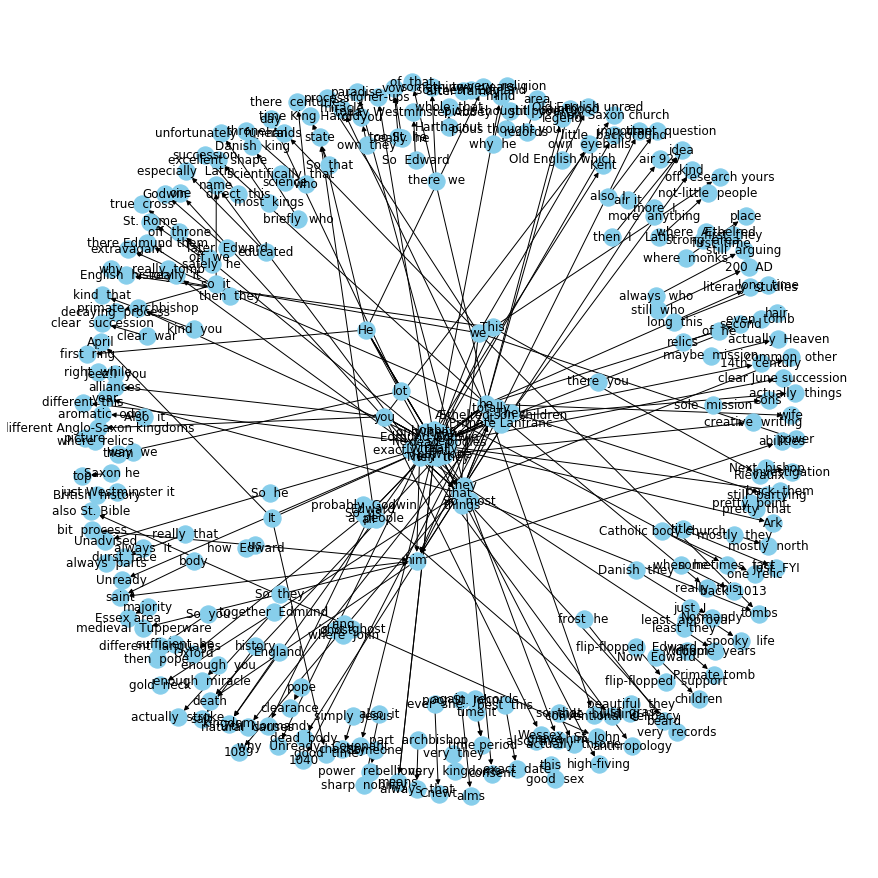

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [24]:
pd.Series(relations).value_counts()[:50]

is                27
was               25
have               9
know               8
are                7
had                6
going              6
let                5
Yeah               5
am                 4
want               4
think              4
buried             4
has                4
got                4
seen               3
opened             3
Incorruptible      3
happened           3
been               3
were               3
yeah               3
Right              3
Exactly            3
married            2
be                 2
graduated with     2
did                2
Yes                2
Okay               2
come               2
made               2
necessary          2
forgot             2
lay in             2
is in              2
hope               2
get                2
Frebrezed          2
do                 2
Eventually         1
wonder about       1
take               1
twist              1
comes from         1
laughs             1
like               1
wrote        

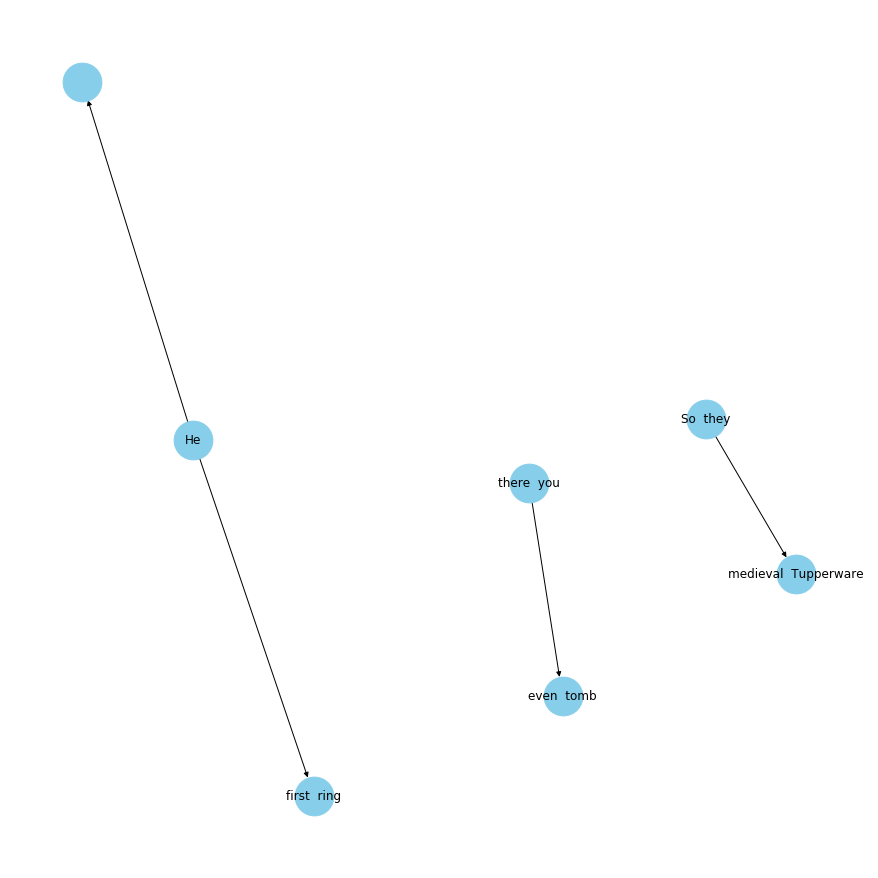

In [25]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="buried"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [ ]:
#intent from multiple sentences sample

doc = nlp("I have finsihed my soda. I want another one.I want another one.")
verbList = [("order", "want", "give", "make"), ("show", "find")]
dobjList = [("pizza", "pie", "pizzaz"), ("cola", "soda")]
substitutes = [("one", "it", "same", "more")] # things to replace
intent = {'verb':",'dobj':"}

for sent in doc.sents:
    for token in sent:
        if token.dep_ == 'dobj':
            verbSyns = [item for item in verbList if token.head.text in item]
            dobjSyns = [item for item in dobjList if token.text in item]
            substitute = [item for item in substitutes if token.text in item]
            if (dobjSyns != [] or substitute !=[]) and verbSyns !=[]:
                intent['verb'] = verbSyns[0][0]
            if dobjSyns !=[]:
                intent['dobj'] = dobjSyns[0][0]
            print("verbsy", verbSyns, "dobj", dobjSyns, "")
intentStr = intent['verb'] + intent['dobj'].capitalize()
print(intentStr)

In [ ]:
doc = nlp("I want to place an order for a pizza") #want intent if main words are not transitive verb or direct object
dobj, tverb = "", ""

for token in doc: #find direct object and corressponding transitive verb
    if token.dep_ == "dobj":
        dobj = token
        tverb = token.head
intentVerb = ""
verbList = ["want", "like", "need", "order"]
if tverb.text in verbList:# if tverb is what we are looking for
    intentVerb = tverb
else:
    if tverb.head.dep_ == "ROOT":#if not, then we look at root of sentence for real intent verb
        intentVerb = tverb.head
intentObj = ""
objList = ['pizza', 'cola']
if dobj.text in objList:
    intentObj = dobj
else: 
    for child in dobj.children:
        if child.dep_ == 'prep':
            intentObj = list(child.children)[0]
            break
        elif child.dep_ == 'compound':
            intentObj = child
            break
print(intentVerb.text + intentObj.text.capitalize())

In [ ]:
print("test") 

def extract_report(doc): 
    phrase = '' 
    for token in doc: 
#         print(token.text, token.pos_, spacy.explain(token.pos_), token.dep_, token.head)
        if token.pos_ =="NUM":
#             print(token.text, token.head.text)
            while True:
                phrase += " "+token.text
                token = token.head
                if token not in list(token.head.lefts):
                    phrase += " "+token.text
                    break
            
            for i in token.subtree:
                if i.dep_ == "acl":
                    phrase +=" " + i.text
                    break
            break
    phrase = phrase.strip()
    print(phrase)
#     print(doc[token.i].text)
    while True:
        token = doc[token.i].head

        if token.pos_ != "ADP":
            phrase = token.text +" "+ phrase
        if token.dep_ == "ROOT":
            break
    # print(phrase)
    for tok in token.lefts:
        if tok.dep_=="nsubj":
    #         print([tok.text for tok in tok.lefts], tok.text)
            phrase = " ".join([tok.text for tok in tok.lefts]) + ' ' + tok.text + ' ' + phrase
            break
#     print(phrase) 
    return phrase
doc = nlp("The company, whose profits reached a record high this year, largely attributed to changes in management, earned a total revenue of $4.26 million.")

phrase = extract_report(doc)
print(phrase)

# for i, token in enumerate(doc): 
#     print(token.text, token.pos_, spacy.explain(token.pos_), token.dep_, token.head)

In [ ]:
def det_destination(doc):
    for i, token in enumerate(doc):
        if token.ent_type!=0 and token.ent_type =="GPE":
            while True: #keep iterating back from gpe to either word "to" or the root
                token = token.head
                if token.text == "to":
                    return doc[i].text
                if token.head == token: #if we reach root and no to is found
                    return "failure to determine"
    return "failure to determine"



dot = nlp("I am going to the conference in Berlin")
print("It seems the user wants a ticket to ", det_destination(doc))

In [ ]:
def dep_pattern(doc): #iterate through tokens to find subject + auxiliary + Root + object pattern
    for i in range(len(doc)):
        if doc[i].dep_ == 'nsubj' and doc[i+1].dep_ == "aux" and doc[i+2].dep_ == "ROOT":
            for tok in doc[i+2].children:
                if tok.dep_== "dobj":
                    return True
    return False

def pos_pattern(doc): #iterate through tokens,check if dep_ pattern subject and object are both personal pronouns
    for token in doc:
        if token.dep_ == 'nsubj' and token.tag_ != 'PRP': #prp is personal pronoun
            return False
        if token.dep_ == 'aux' and token.tag_ != 'MD':
            return False
        if token.dep_ == 'ROOT' and token.tag_ != 'VB':
            return False
        if token.dep_ == 'dobj' and token.tag_ != 'PRP':
            return False
    return True

def pron_pattern(doc):
    plural = ["we", "us", "they", "them"]
    for token in doc:
        if token.dep_ == "dobj" and token.tag_ == "PRP":
            if token.text in plural:
                print(spacy.explain(token.pos_))
                return 'plural'
            else:
                return 'regular'
            
    return "not found"
def find_noun(sents, num):
    if num =="plural":
        taglist = ["NNS", "NNPS"]
    if num =="singular":
        taglist = ["NN", "NNP"]
    for sent in reversed(sents):
        for token in sent:
            if token.tag_ in taglist:
                current_noun = token.text
                for w in token.children:
                    if w.dep_ == "det":
                        current_noun = w.text + " " + current_noun
                return current_noun
    return "noun not found"

def gen_utterance(doc, noun):
    sent = ''
    for i, token in enumerate(doc):
        if token.dep_ == 'dobj' and token.tag_ == 'PRP':
            sent = doc[:i].text+' '+noun.lower()+' '+doc[i+1:len(doc)-2].text + 'too.'
            return sent
        
    return "failed to generate utterance"



doc = nlp("The symbols are clearly distinguishable. I can recognize them promptly.")
# displacy.serve(doc, style="dep")
# for tok in doc:
#     print(tok.text, tok.tag_,spacy.explain(tok.tag_), "****", tok.head, tok.dep_, spacy.explain(tok.dep_))
sents = list(doc.sents)
response = ''
noun = ''
for i, sent in enumerate(sents):
    if dep_pattern(sent) and pos_pattern(sent):
        noun = find_noun(sents[:i], pron_pattern(sent))
        if noun != "noun not found":
            response = gen_utterance(sents[i], noun)
            break
print(response)          



In [7]:
nlp = spacy.load("en_core_web_lg")
token = nlp("fruits")[0]
doc = nlp("I want to buy this beautiful book at the end of the week. Sales of citrus have increased over the last year. How much do you know about this type of tree?")
similarity = {}
for i, sent in enumerate(doc.sents):
    noun_span_list = [sent[j].text for j in range(len(sent)) if sent[j].pos_ == 'NOUN']
    noun_span_str = " ".join(noun_span_list)
    noun_span_doc = nlp(noun_span_str)
    similarity.update({i:token.similarity(noun_span_doc)})
print(similarity)

{0: 0.21712280212037027, 1: 0.5007358701854312, 2: 0.3960727373866738}


In [9]:
doc1 = nlp(u'You know, the guy who helped found Wikipedia. And and he he convinced me that, look, you know, you can make some design choices, whether it is at Facebook or Twitter, at Wikipedia or Reddit or whatever, and depending on how you make those choices. you are more likely or less likely to have false news, create a little bit of friction, like you said.') 
#second sample text
doc2 = nlp(u'This guy, like 12 people would say, I am going to be the end instead with video or whatever. You you get tens of millions of people it and I have seen this. I look at it, I get angry. Like, I can not believe that person did something so terrible.') 
#third sample text
doc3 = nlp(u"You know, I have played around with some of those VR headsets and they are not great. But I mean, the average person spends many waking hours staring at screens right now. You know, they are kind of low res compared to what they could be in 30 or 50 years. But certainly games and why not any other interactions could be done with VR.")
docs = [doc1, doc2, doc3]
spans = {}
for j, doc in enumerate(docs):
    ner_span = [doc[i].text for i in range(len(doc)) if doc[i].ent_type != 0]
#     ner_span = [(e.text, e.label_, e.type_) for e in doc.ents]
    print(ner_span)
    ner_span = " ".join(ner_span)
    ner_span = nlp(ner_span)
    spans.update({j:ner_span})
print('doc1 is similar to doc2:',spans[0].similarity(spans[1]))
print('doc1 is similar to doc3:',spans[0].similarity(spans[2]))
print('doc2 is similar to doc3:',spans[1].similarity(spans[2]))

['Facebook', 'Twitter', 'Wikipedia']
['12', 'tens', 'of', 'millions']
['VR', 'hours', '30', 'or', '50', 'years', 'VR']
doc1 is similar to doc2: 0.22648547887281678
doc1 is similar to doc3: 0.24649546947346165
doc2 is similar to doc3: 0.5663748876965428


In [ ]:
print('england is similar to anglo:',nlp("england").similarity(nlp("india")))
print('india is similar to pakistan:',nlp("india").similarity(nlp("pakistan")))
print('england is similar to pakistan:',nlp("england").similarity(nlp("america")))

In [ ]:
doc = nlp("I can surely promise it is worth your time.")
for tok in doc:
    print(tok.text, tok.pos_,  tok.tag_,spacy.explain(tok.tag_), "****", tok.head, tok.dep_, spacy.explain(tok.dep_))


In [ ]:
sent = ''
for i, token in enumerate(doc):
    if token.tag_ == "PRP" and doc[i+1].tag_ == "MD":
        sent.append(doc[i+1].text.capitalize() + ' '+ doc[i].text +' '+ doc[i+2:].text)

doc = nlp(sent)
for i, token in (doc):
    if token.tag_ == "PRP" and 
print(sent)

In [ ]:
def find_chunk(doc):
    chunk = ""
    for i, tok in enumerate(doc):
        if tok.dep_ == "dobj":
            

In [ ]:
doc = nlp("I want to order a vetgetarian pizza")
for tok in doc:
    print(tok.text, tok.tag_,spacy.explain(tok.tag_), "****", tok.dep_, spacy.explain(tok.dep_))

In [ ]:
doc1 = nlp("we must overtake them")
doc2 = nlp("you must specify it")

for i in range(0, len(doc1)):
    if doc1[i].dep_ == doc2[i].dep_:
        print(doc1[i].text, doc2[i].text, doc1[i].dep_,)
    

In [ ]:
matcher = Matcher(nlp.vocab)
pattern = [{"DEP": "nsubj"}, {"DEP": "aux"}, {"DEP":"ROOT"}]
matcher.add("nsubjauxroot", None, pattern)
doc = nlp("We can overtake them")
matches = matcher(doc)
for match_id, start, end in matches:
    span = doc[start:end]
    print("Span: ", span.text)
    print("pos are", start ,end)

In [ ]:
text = """Mary is playing a very old violin. She is very good at it."""
facts = nlp(text)
facts._.coref_resolved

In [17]:
%%time
def text_fix(text): #expands contractions, fixes quotations, possessive nouns use special character
    text = re.sub(r"\b(\w+)\s+\1\b", r"\1", text)
    text = re.sub(r"\b(\w+ \w+)\s+\1\b", r"\1", text)
    text = re.sub(r"\b(\w+ \w+)\s+\1\b", r"\1", text)
    text = re.sub(r"\b(\w+ \w+)\s+\1\b", r"\1", text)
    text = re.sub(r"\b(\w+ \w+ \w+)\s+\1\b", r"\1", text)
    text = re.sub(r"\b(\w+ \w+ \w+ \w+)\s+\1\b", r"\1", text)
    text = text.replace("you know, ","").replace(", you know","").replace("you know","").replace("I mean, ","")
    
    text = contractions.fix(text).translate(str.maketrans({"‘":"'", "’":"'", "“":"\"", "”":"\""})).replace("\n", " ").replace("a.k.a.", "also known as")
    text = re.sub(" like,",r"", text)
    return re.sub(r"([a-z])'s",r"\1’s", text)

with open("corrected.txt", "w+") as w:
    w.write(text_fix(open("Lex_Fridman_Podcast/140-lisa-feldman-barrett-love-evolution-and-the-human-brain.txt").read()))
print("done")

done
CPU times: user 85.9 ms, sys: 240 µs, total: 86.2 ms
Wall time: 101 ms


In [18]:
print(spacy.lang.en.stop_words.STOP_WORDS)

{'due', 'give', 'yourselves', 'whenever', "'s", 'former', 'beside', 'until', '’ve', 'everyone', 'some', 'you', 'take', 'through', 'throughout', 'can', 'here', 'back', 'his', 'we', 'whom', 'so', 'really', 'him', 'somehow', 'it', 'our', 'amount', 'of', 'yet', 'myself', 'thereafter', 'whence', 'sometimes', 'part', 'just', 'herself', 'once', 'became', 'via', 'eight', 'whole', 'call', 'six', 'off', 'these', 'who', 'nobody', 'most', 'is', 'and', 'enough', 'well', 'were', 'besides', 'those', 'around', 'hence', 'keep', 'often', 'few', 'rather', 'made', 'show', 'out', 'if', 'seemed', 'never', 'now', 'her', 'always', 'afterwards', 'one', "n't", 'say', 'thus', 'must', 'doing', 'last', '’re', '‘s', 'at', 'empty', 'above', 'as', 'mine', 'against', 'nowhere', 'everywhere', 'move', 'hereupon', 'might', 'an', 'used', 'same', 'using', 'no', 'while', 'together', 'among', 'thence', 'all', 'with', 'meanwhile', 'top', 'thru', 'into', 'forty', 'since', 'bottom', 'although', 'than', 'will', 'even', 'four', '